# 直流电机模型   

建立直流电机的模型，并将仿真结果写入`result.csv` 文件

In [51]:
import csv
from src.rk4 import  Module  

# 电机参数
J = 0.01
b = 0.1
Ke = 0.01
Kt = 0.01
R = 1
L = 0.5  

# PID 参数
Kp = 75 
Ki = 100 
Kd = 10  
r = 1  # 给定输入

motor = Module(end=4, h=0.001)

# 转角
theta = motor.createState(name="theta", func=lambda: omega)
# 转速
omega = motor.createState(name="omega", func=lambda: -b/J*omega + Kt/J*i )
# 角加速度
alpha = motor.createState(name="alpha", func=lambda: -b/J*alpha + Kt/J*i.prime())  
# 电枢电流
i = motor.createState(name="i", func=lambda: -Ke/L*omega  -R/L*i + u/L)  

# 控制器部分，现在是作为电机的一部分，理论上应该单独拿出来作为一个模块的
# 误差e = r-omega
e = motor.createState(name="e", func=lambda: -alpha, init_value=r)  
# 控制器输出电压
u = motor.createState(name="u", func=lambda: Kp*e.prime() + Ki*e - Kd*alpha.prime(), init_value=Kp*e)


my_array = motor.run()

with open('result.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(my_array)


读取`result.csv` 结果，并绘制曲线图。结果的大致趋势是一样的，可是，系统的响应时间有些滞后。`simulink` 在`0.674s` 时达到最大值。    

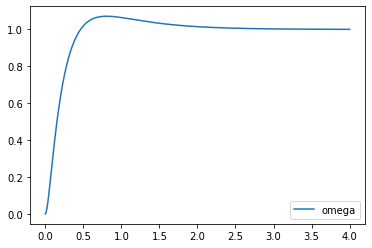

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
data = pd.read_csv('result.csv')

# plt.plot(data["_time"], data['module_i'], label="i")
# plt.plot(data["_time"], data['module_theta'], label="theta")
plt.plot(data["_time"], data['module_omega'], label="omega")
# plt.plot(data["_time"], data['module_alpha'], label="alpha")
# plt.plot(data["_time"], data['module_e'], label="e")
# plt.plot(data["_time"], data['module_u'], label="u")

plt.legend()
plt.show()

## 关于PID 模块初始值的问题  

考虑实际情况下，PID 模块的最初输出值应该是0 吗？